# Demo module 4
Daniela Najmias Lang

https://www.nytimes.com/2025/11/13/learning/whats-going-on-in-this-graph-nov-19-2025.html

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import matplotlib as mpl

In [2]:
# style

TITLE = "The 10 Most-Watched Nonsports Entertainment Programs,\nRanked by Year"
COLORS = {
    "parade": "#4b2500",     # dark brown
    "awards": "#e9a7a7",     # soft pink
    "60m":    "#ddc7ae",     # beige
    "ncis":   "#7f9baa",     # muted blue
    "other":  "#e6e6e6",     # light gray
}

mpl.rcParams["font.family"] = "DejaVu Serif"  # close to NYT serif
mpl.rcParams["figure.dpi"] = 150

In [3]:
# extracting data manually to create a grid

grid = [
    # rank 1 (top row)
    ["awards","awards","awards","awards","awards","other","awards","other","parade","parade","parade"],
    # rank 2
    ["other","other","other","other","other","awards","other","awards","other","awards","awards"],
    # rank 3
    ["awards","other","other","other","other","parade","parade","parade","other","other","other"],
    # rank 4
    ["parade","awards","awards","parade","parade","60m","other","other","other","60m","other"],
    # rank 5
    ["ncis","other","other","awards","awards","other","other","other","60m","60m","other"],
    # rank 6
    ["other","other","parade","60m","other","other","other","other","60m","60m","other"],
    # rank 7
    ["ncis","parade","other","other","other","other","other","60m","60m","60m","60m"],
    # rank 8
    ["ncis","other","ncis","other","other","other","awards","other","60m","60m","60m"],
    # rank 9
    ["ncis","ncis","ncis","60m","other","other","other","other","60m","60m","other"],
    # rank 10 (bottom row)
    ["ncis","other","other","ncis","other","other","other","other","awards","60m","60m"],
]


In [4]:
# year labeling at top to match
year_labels = ["","2014", "", "’16", "", "’18", "", "’20", "", "’22", ""]  # 11 columns

In [5]:
# parameters

n_rows = 10
n_cols = 11

cell = 1.0          # base unit
gap = 0.2          # spacing between squares
rounding = 0.10     # corner roundness


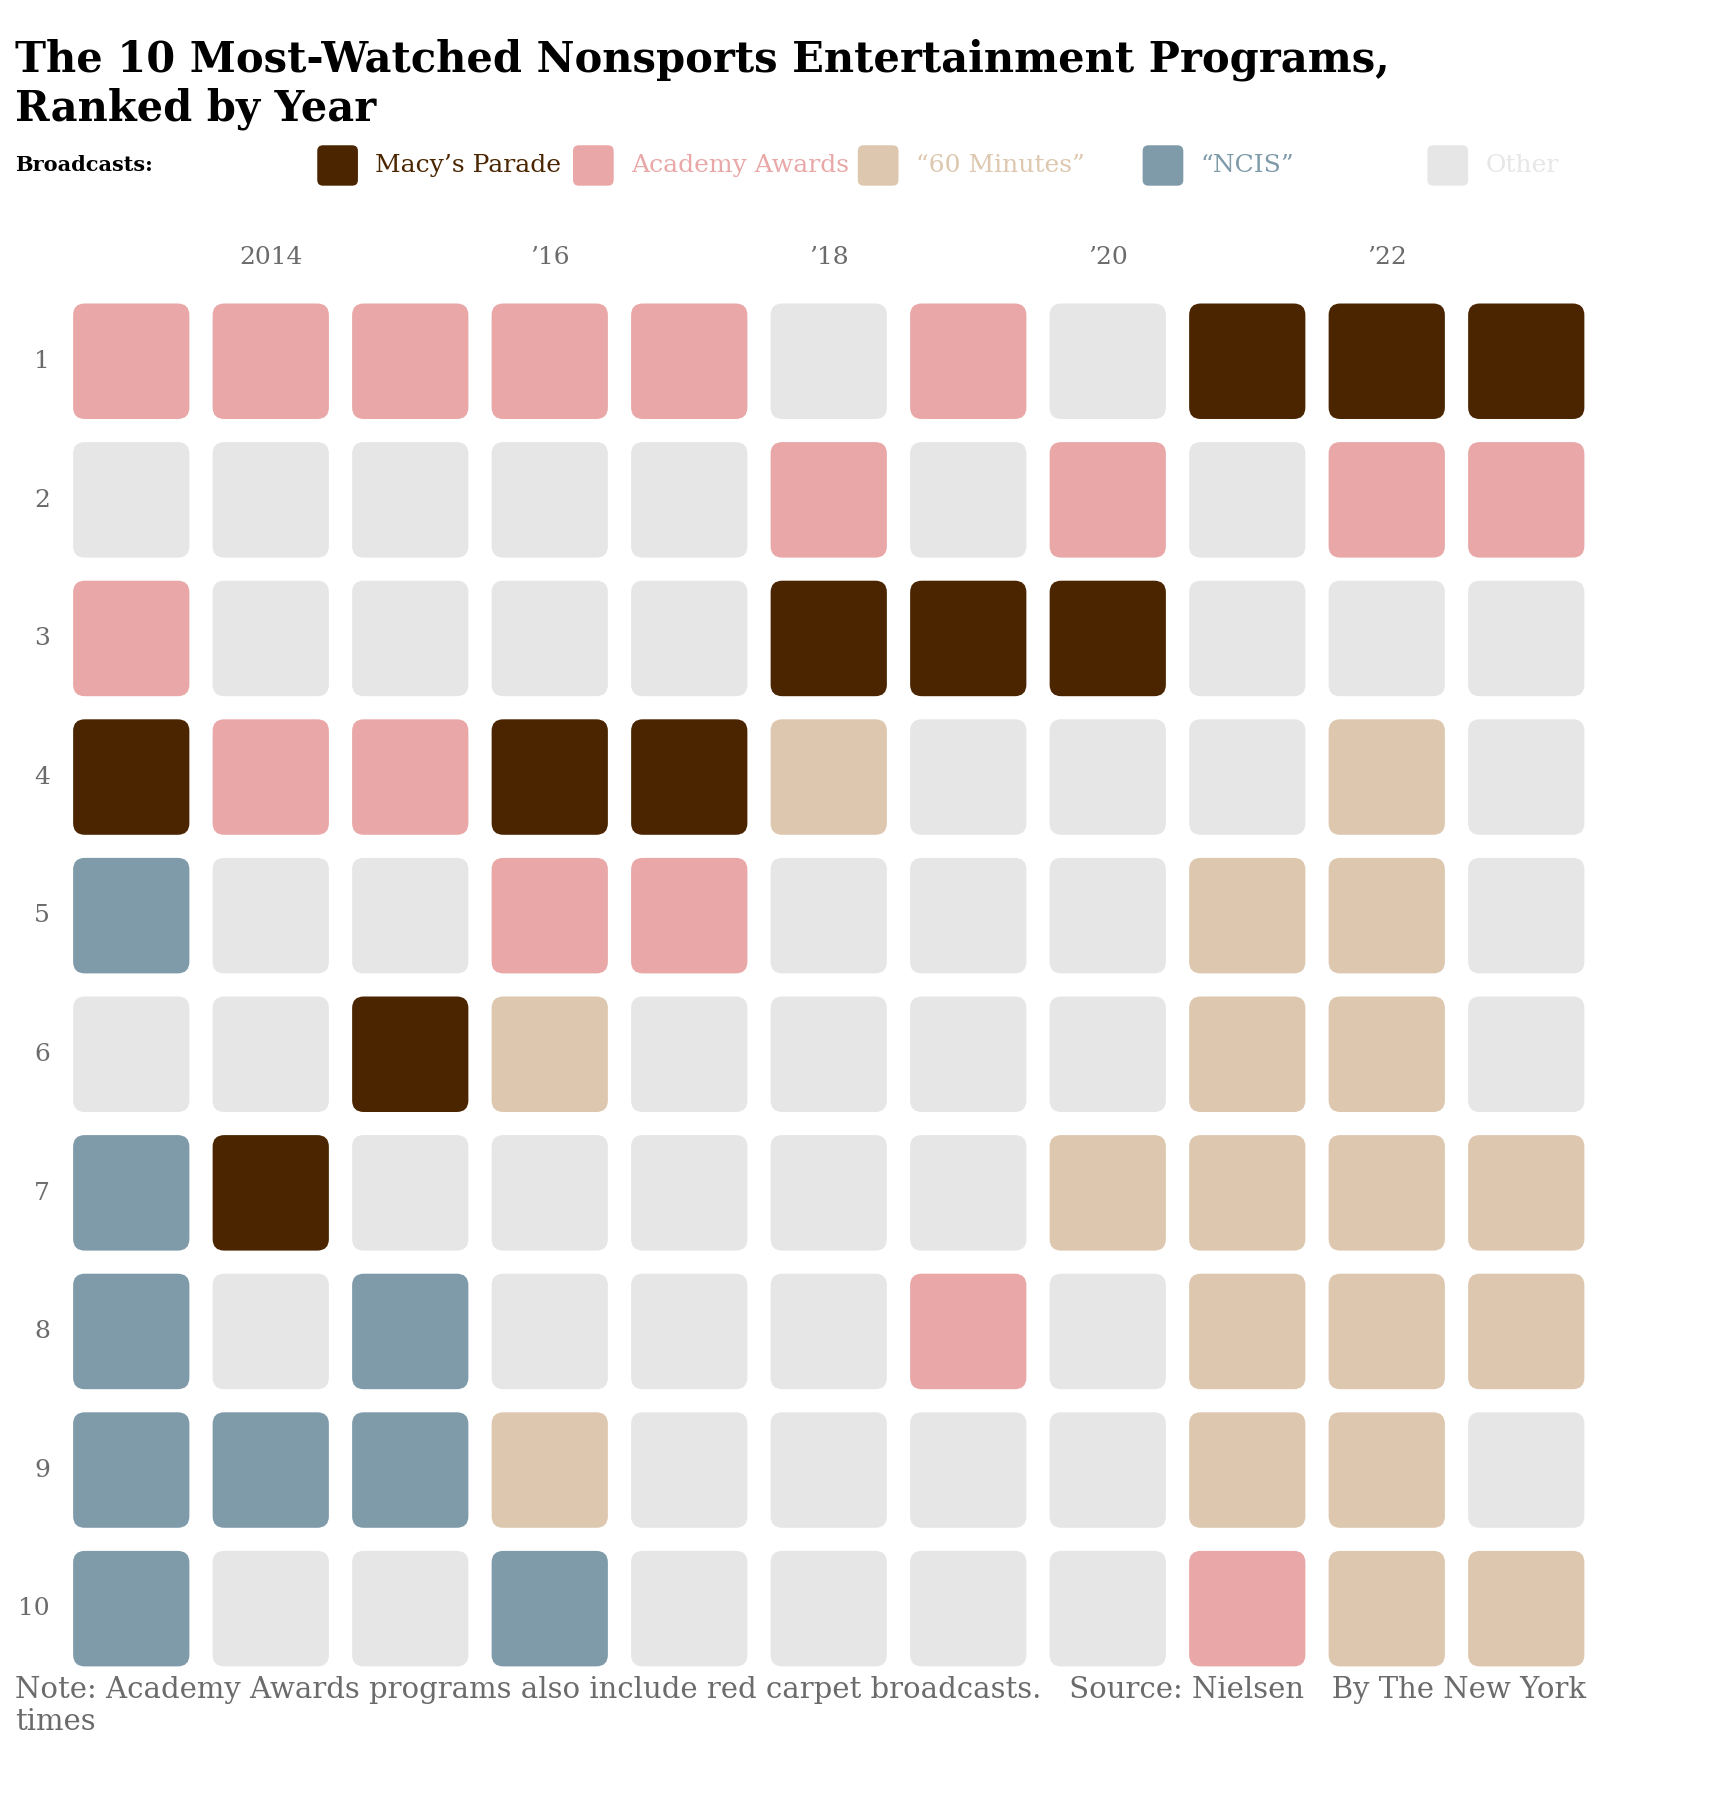

In [6]:
# layout offsets
left_margin = 0.5
top_margin = 2.5
bottom_margin = 1

fig_w = left_margin + n_cols*(cell+gap) + 0.8
fig_h = top_margin + n_rows*(cell+gap) + bottom_margin

fig, ax = plt.subplots(figsize=(fig_w, fig_h))
ax.set_xlim(0, fig_w)
ax.set_ylim(0, fig_h)
ax.axis("off")

# title
ax.text(0, fig_h-0.2, TITLE, ha="left", va="top", fontsize=20, fontweight="bold")

# Legend
legend_y = fig_h-1.3
ax.text(0, legend_y, "Broadcasts:", ha="left", va="center", fontsize=10, fontweight="bold")

legend_items = [("Macy’s Parade","parade"), ("Academy Awards","awards"), ("“60 Minutes”","60m"), ("“NCIS”","ncis"), ("Other","other")]
lx = 2.6

for name, key in legend_items:
    # colored square
    ax.add_patch(FancyBboxPatch((lx, legend_y-0.18), 0.35, 0.35,
                               boxstyle=f"round,pad=0,rounding_size=0.05",
                               linewidth=0, facecolor=COLORS[key]))
    ax.text(lx+0.5, legend_y, name, ha="left", va="center", fontsize=12,
            color=("#4b2500" if key in ["parade"] else ("#e9a7a7" if key=="awards" else ("#ddc7ae" if key=="60m" else ("#7f9baa" if key=="ncis" else "#e6e6e6")))))
    lx += 2.45 if key!="parade" else 2.2

# year label

grid_top_y = fig_h - top_margin
for c in range(n_cols):
    if year_labels[c]:
        x = left_margin + c*(cell+gap) + cell/2
        ax.text(x, grid_top_y + 0.40, year_labels[c], ha="center", va="center", fontsize=12, color="#6b6b6b")

# rank label
for r in range(n_rows):
    # rank numbers
    rank = r+1 # 1 at top
    y = grid_top_y - r*(cell+gap) - cell/2
    ax.text(left_margin-0.2, y, str(rank), ha="right", va="center", fontsize=12, color="#6b6b6b")

    # tiles
    for c in range(n_cols):
        x0 = left_margin + c*(cell+gap)
        y0 = grid_top_y - (r+1)*(cell+gap) + gap  # bottom of cell
        key = grid[r][c]
        ax.add_patch(
            FancyBboxPatch(
                (x0, y0),
                cell, cell,
                boxstyle=f"round,pad=0,rounding_size={rounding}",
                linewidth=0,
                facecolor=COLORS[key]
            )
        )

# footnote - let's add that also
note = "Note: Academy Awards programs also include red carpet broadcasts.   Source: Nielsen   By The New York\ntimes"
ax.text(0, 0.6, note, ha="left", va="bottom", fontsize=14, color="#6b6b6b")

plt.show()

# Making it interactive

In [11]:
import ipywidgets as widgets
from IPython.display import display

print("Libraries ipywidgets and IPython.display imported.")

Libraries ipywidgets and IPython.display imported.


In [23]:
def plot_interactive_grid(selected_broadcast_type):
    print(f"Plotting for: {selected_broadcast_type}") # Added for debugging
    # Re-calculate fig_w and fig_h to ensure consistency if parameters change
    fig_w = left_margin + n_cols*(cell+gap) + 0.8
    fig_h = top_margin + n_rows*(cell+gap) + bottom_margin

    fig, ax = plt.subplots(figsize=(fig_w, fig_h))
    ax.set_xlim(0, fig_w)
    ax.set_ylim(0, fig_h)
    ax.axis("off")

    # title
    ax.text(0, fig_h-0.2, TITLE, ha="left", va="top", fontsize=20, fontweight="bold")

    # Legend
    legend_y = fig_h-1.3
    ax.text(0, legend_y, "Broadcasts:", ha="left", va="center", fontsize=10, fontweight="bold")

    lx = 2.6
    for name, key in legend_items:
        # colored square
        ax.add_patch(FancyBboxPatch((lx, legend_y-0.18), 0.35, 0.35,
                                   boxstyle=f"round,pad=0,rounding_size=0.05",
                                   linewidth=0, facecolor=COLORS[key]))
        # Simplify legend text color to always use its original color
        ax.text(lx+0.5, legend_y, name, ha="left", va="center", fontsize=12, color=COLORS[key])
        lx += 2.45 if key!="parade" else 2.2

    # year label
    grid_top_y = fig_h - top_margin
    for c_idx in range(n_cols):
        if year_labels[c_idx]:
            x = left_margin + c_idx*(cell+gap) + cell/2
            ax.text(x, grid_top_y + 0.40, year_labels[c_idx], ha="center", va="center", fontsize=12, color="#6b6b6b")

    # rank label
    for r_idx in range(n_rows):
        # rank numbers
        rank = r_idx+1 # 1 at top
        y = grid_top_y - r_idx*(cell+gap) - cell/2
        ax.text(left_margin-0.2, y, str(rank), ha="right", va="center", fontsize=12, color="#6b6b6b")

        # tiles
        for c_idx in range(n_cols):
            x0 = left_margin + c_idx*(cell+gap)
            y0 = grid_top_y - (r_idx+1)*(cell+gap) + gap  # bottom of cell
            tile_key = grid[r_idx][c_idx]

            # Conditional facecolor logic
            if selected_broadcast_type == 'All':
                tile_facecolor = COLORS[tile_key]
            elif tile_key == selected_broadcast_type:
                tile_facecolor = COLORS[tile_key]
            else:
                tile_facecolor = COLORS['other'] # Neutral color

            ax.add_patch(
                FancyBboxPatch(
                    (x0, y0),
                    cell, cell,
                    boxstyle=f"round,pad=0,rounding_size={rounding}",
                    linewidth=0,
                    facecolor=tile_facecolor
                )
            )

    # footnote
    ax.text(0, 0.6, note, ha="left", va="bottom", fontsize=14, color="#6b6b6b")

    # Close the figure after returning to prevent memory leaks in interactive contexts
    # plt.close(fig) # Removed this line

    return fig

print("Function 'plot_interactive_grid' defined.")

Function 'plot_interactive_grid' defined.


In [24]:
dropdown_options = [('All', 'All')]
for name, key in legend_items:
    dropdown_options.append((name, key))

broadcast_dropdown = widgets.Dropdown(
    options=dropdown_options,
    value='All', # Default selected value
    description='Broadcast Type:',
    disabled=False,
)

print("Dropdown options prepared.")

Dropdown options prepared.


In [25]:
output = widgets.interactive_output(plot_interactive_grid, {'selected_broadcast_type': broadcast_dropdown})

display(broadcast_dropdown, output)

print("Interactive dropdown linked to plotting function.")

Dropdown(description='Broadcast Type:', options=(('All', 'All'), ('Macy’s Parade', 'parade'), ('Academy Awards…

Output()

Interactive dropdown linked to plotting function.


# Now that it's interactive, upload to streamlit

In [26]:
!pip install -q streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.7 MB/s eta 0:00:00


In [30]:
%%writefile app.py
import streamlit as st

st.title('My First Streamlit App in Colab')
st.write('Hello, *World!* :sunglasses:')

x = st.slider('Select a value')
st.write(x, 'squared is', x * x)


Overwriting app.py
